(60000, 28, 28)
(1800, 28, 28) (1800,)
(900, 28, 28) (900,)
(900, 28, 28) (900,)
['top' 'trouser' 'pullover' 'dress' 'coat' 'sandal' 'shirt' 'sneaker'
 'bag' 'ankle boot']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


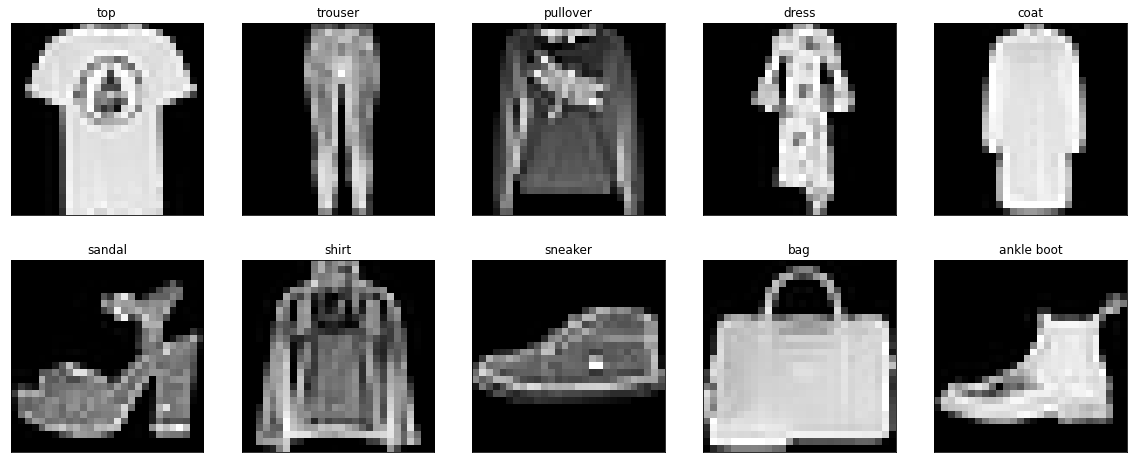

(900, 28, 28) (900,) (900, 28, 28) (900,)


In [1]:
from keras.datasets import cifar10, cifar100, cifar, fashion_mnist
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(X, y), _ = fashion_mnist.load_data()
print(X.shape)
X, _, y, _ = train_test_split(X, y, train_size=0.03)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
classes = np.array(["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"])
labels = list(range(0, 10))
print(classes)
print(labels)


def visualize(images, labels, n_images=10):
    rows = 2
    plt.figure(figsize=(20, 8))
    for i in range(rows):
        for j in range(n_images // rows):
            ax = plt.subplot(rows, n_images // rows, i * n_images // rows + j + 1)
            plt.imshow(images[i * n_images // rows + j], cmap="gray")
            plt.grid(visible=False)
            plt.xticks([])
            plt.yticks([])
            plt.title(labels[i * n_images // rows + j])
    plt.show()


labels, idx = np.unique(y_train, return_index=True)
visualize(X_train[idx, :, :], classes)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
Total params: 42,728
Trainable params: 42,728
Non-traina

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
29/29 [==============================] - 1s 19ms/step - loss: 1.8515 - accuracy: 0.4078 - val_loss: 1.2691 - val_accuracy: 0.5133
Epoch 2/10
29/29 [==============================] - 0s 12ms/step - loss: 1.0802 - accuracy: 0.5933 - val_loss: 0.9757 - val_accuracy: 0.6133
Epoch 3/10
29/29 [==============================] - 0s 12ms/step - loss: 0.8874 - accuracy: 0.6478 - val_loss: 0.8358 - val_accuracy: 0.6767
Epoch 4/10
29/29 [==============================] - 0s 11ms/step - loss: 0.7542 - accuracy: 0.7133 - val_loss: 0.7790 - val_accuracy: 0.6944
Epoch 5/10
29/29 [==============================] - 0s 11ms/step - loss: 0.6993 - accuracy: 0.7244 - val_loss: 0.7280 - val_accuracy: 0.7333
Epoch 6/10
29/29 [==============================] - 0s 11ms/step - loss: 0.7117 - accuracy: 0.7256 - val_loss: 0.7783 - val_accuracy: 0.6989
Epoch 7/10
29/29 [==============================] - 0s 11ms/step - loss: 0.6141 - accuracy: 0.7744 - val_loss: 0.6979 - val_accuracy: 0.7489
Epoch 8/10
29

29/29 - 0s - loss: 0.6433 - accuracy: 0.7767 - 100ms/epoch - 3ms/step


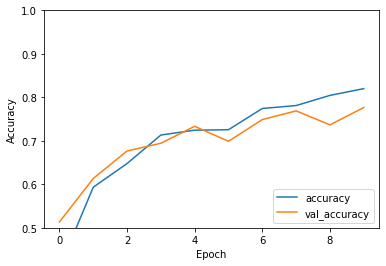

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [8]:
print(test_acc)

0.7766666412353516
